In [1]:
import os
import os.path as osp
import pandas as pd
from pyarrow import parquet as pq
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json

## Trying to get some sense out of the metadata

Opening one random target file in the folder. The metadata is very messy:

Each table is stored in a Parquet file which can be processed by different data processing libraries like Pandas, Spark, and Pyarrow. 

Each Parquet file consists of the table itself and its metadata, consisting of:
    
    URL to the original CSV file,
    License of the associated repository,
    Table ID,
    Table dimensions,
    Data types inferred with Pandas,
    Column annotations from different annotation methods and ontologies,
    Table topic annotation derived from column annotations.


We'll have to take the annotations into consideration when we try to use these tables. 

Overall, I conducted a random, cursory search on the tables, opening a bunch of 
them out of curiosity. Tables are very loosely connected to each other by archive, 
the content is unformatted, contains a bunch of mixed data (numerical columns, 
categorical columns, text columns, IDs, lists...). The metadata is similarly 
messy. 

In [5]:
cd ~/work/study-gittables

/home/soda/rcappuzz/work/study-gittables


In [6]:
root_dir = "data/zenodo/tables/"
folder_name = "allegro_con_spirito_tables_licensed"
tgt_folder = osp.join(root_dir, folder_name)


In [7]:
table = pq.read_table(osp.join(tgt_folder, 'Aziende_1.parquet'))
md = table.schema.metadata[b'gittables']
js = json.loads(md.decode('utf-8', errors='strict'))

In [9]:
print(js.keys())

dict_keys(['license', 'csv_url', 'dtypes', 'number_rows', 'number_columns', 'dtypes_percentages', 'dbpedia_syntactic_column_types', 'schema_syntactic_column_types', 'dbpedia_semantic_column_types', 'dbpedia_semantic_similarities', 'schema_semantic_column_types', 'schema_semantic_similarities', 'table_domain', 'anonymized_columns', 'table_id'])


In [18]:
_df = pd.read_csv("data/zenodo/info_tables/info_compiled_md.csv", header=None)
_df.drop(0, axis=1, inplace=True)

In [20]:
columns = [
    "group_name",
    "name",
    "schema_syntactic",
    "schema_semantic",
    "dbpedia_syntactic",
    "dbpedia_semantic",
]
_df.columns = columns

In [22]:
_df.describe(include='all')

,group_name,name,schema_syntactic,schema_semantic,dbpedia_syntactic,dbpedia_semantic
count,1018607,1018607,607213,902036,522478,872203
unique,93,562190,180,306,136,235
top,id_tables_licensed,05-06.parquet,schema:Rating,schema:CreativeWork,http://dbpedia.org/ontology/Person,http://dbpedia.org/ontology/Person
freq,207036,76,230654,394496,344599,366708


<AxesSubplot: xlabel='dbpedia_syntactic', ylabel='schema_syntactic'>

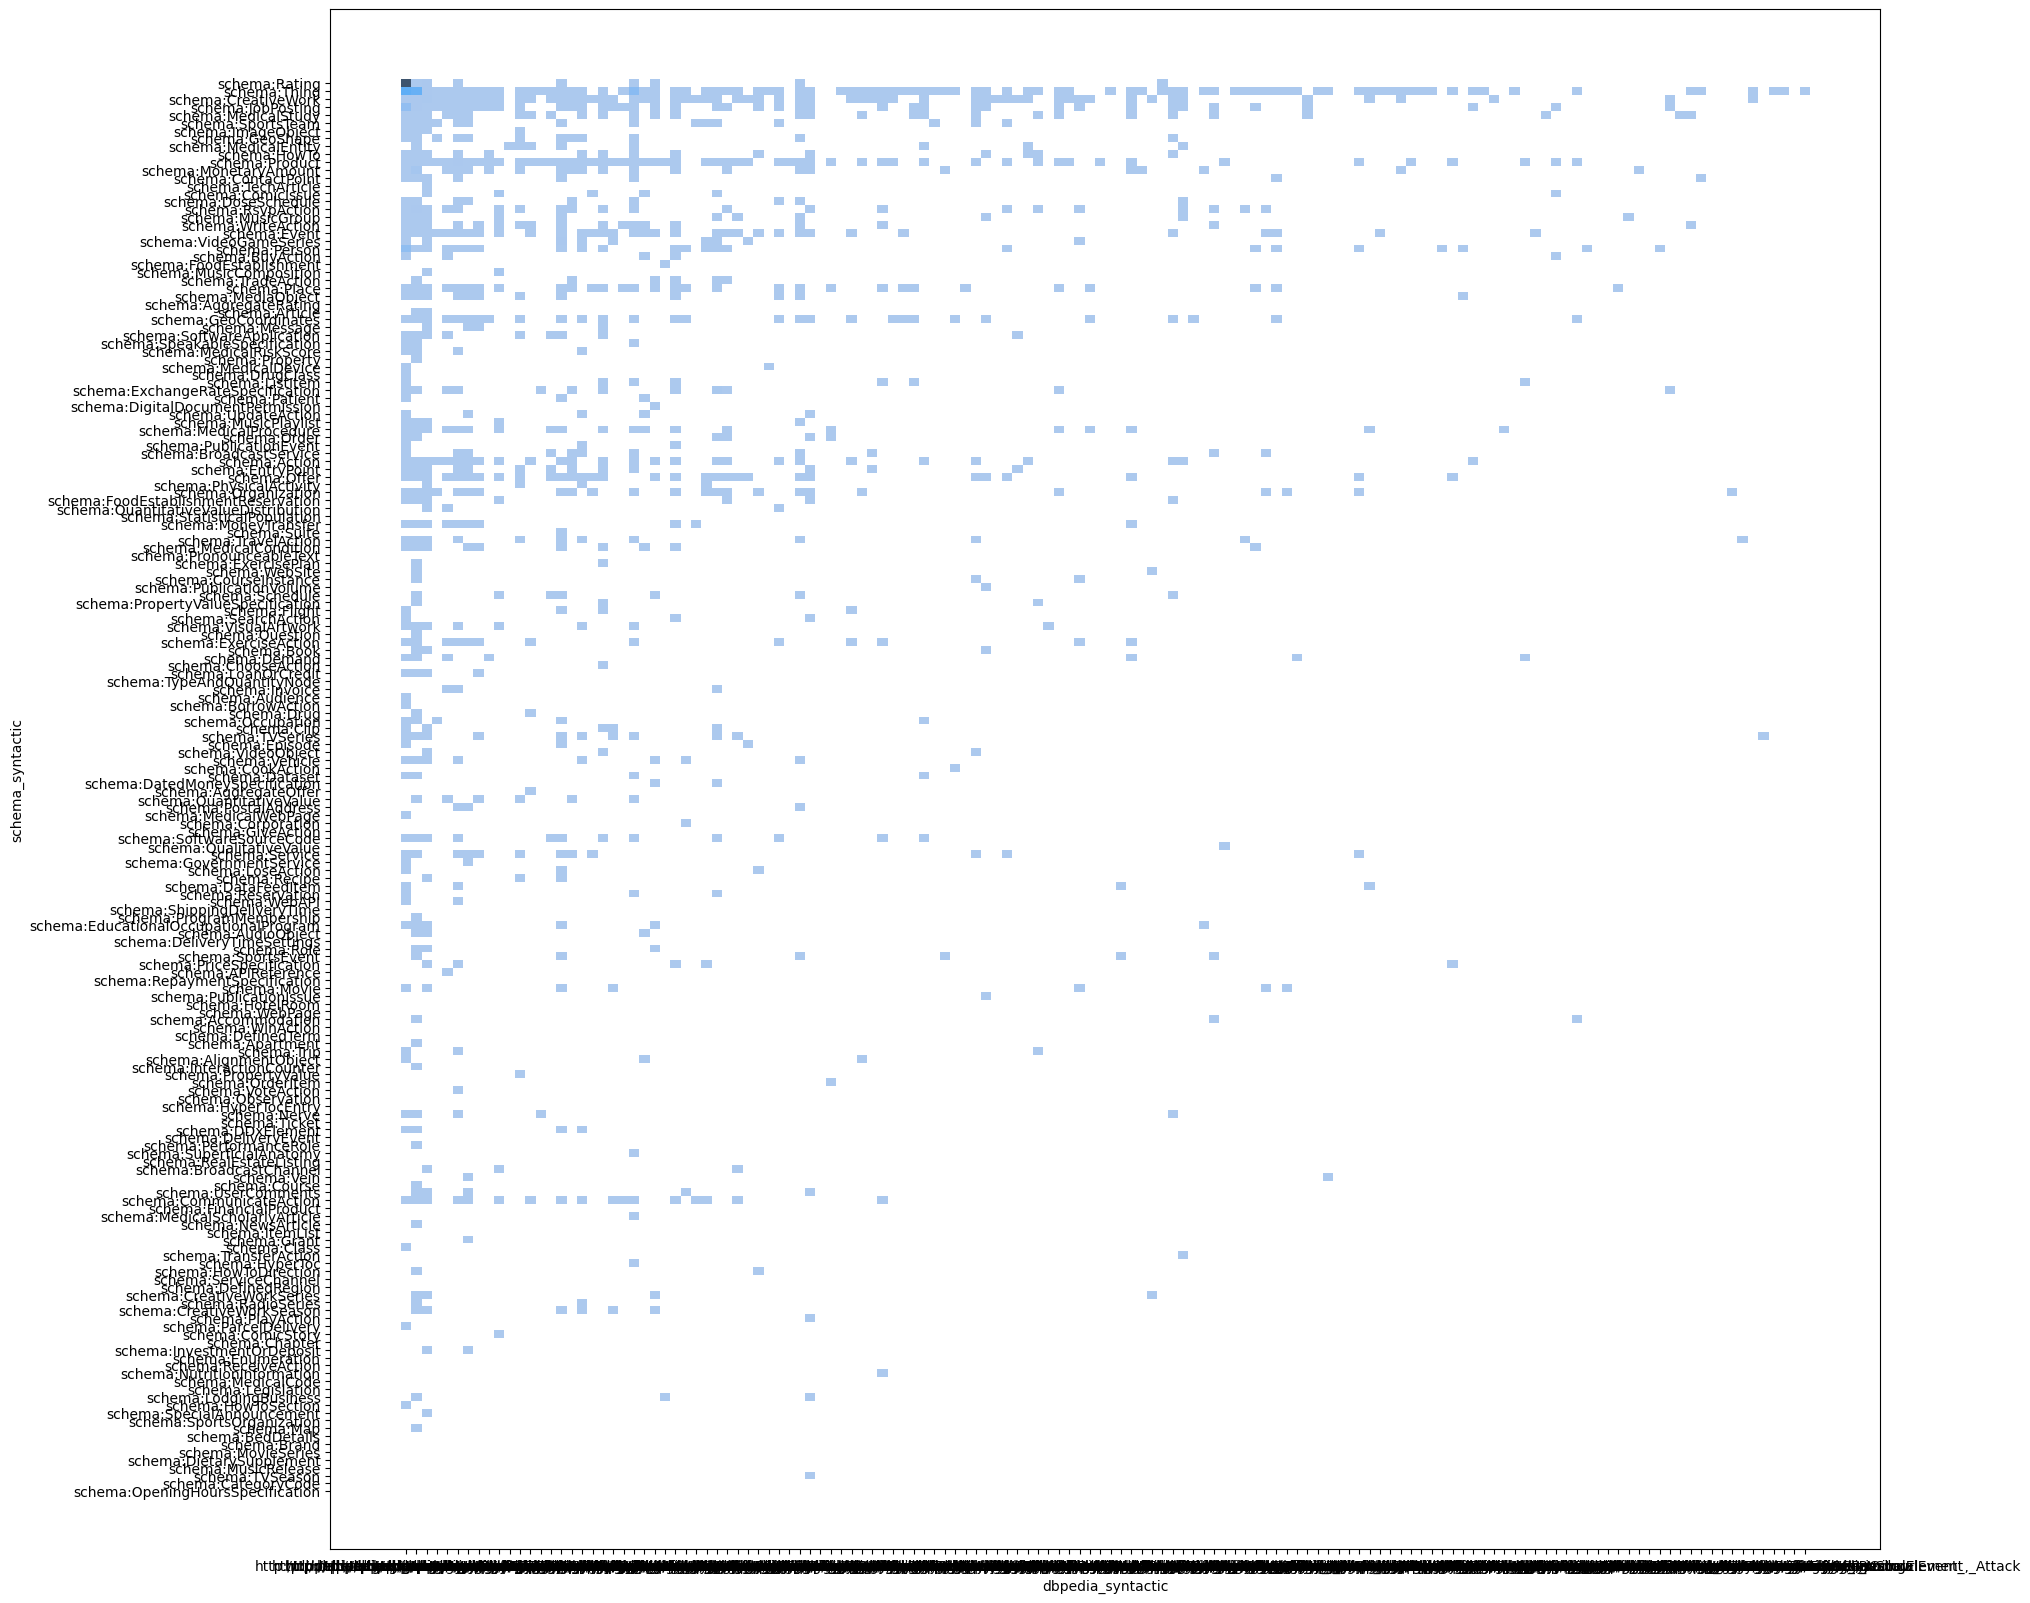

In [25]:
fig, ax = plt.subplots(1, figsize=(20,20))
sns.histplot(data=_df, x="dbpedia_syntactic", y="schema_syntactic", ax=ax)